In [6]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

# 表記

- $P(X, Y)$: 同時確率 (joint probability)
- $P(X | Y)$: 条件付き確率 (conditional probability)

# 用語

- 目的変数 (target variable): 予測したい変数で、関数の出力となる。従属変数とも言う。

# 確率論

## 加法定理 (sum rule)

$p(X) = \sum_Y p(X, Y)$

$p(X)$は他の変数(Y)についての周辺化なので**周辺確率** (marginal probability)とも呼ばれる。

連続変数では、

$p(x) = \int p(x, y)dy$

## 乗法定理 (product rule)

$p(X, Y) = P(Y | X)P(X)$

連続変数では、

$p(x, y) = p(y | x)p(x)$

## ベイズの定理 (Bayes's theorem)

$P(Y | X) = \frac{P(X | Y)P(Y)}{P(X)}$

<p style="margin-left: 120px; font-size: 12px;">
$P(X, Y) = P(Y, X)$より、<br>

$P(Y | X){P(X)} = P(X | Y)P(Y)$<br>

$P(Y | X) = \frac{P(X | Y)P(Y)}{P(X)}$
</p>

加法定理と乗法定理を使えば分母は分子に現れる量で表せる。

$P(Y | X) = \frac{P(X | Y)P(Y)}{\sum_Y P(X | Y)P(Y)}$

## 確率密度 (probability density)

連続変数xが区間$(x, x + \delta x)$に入る確率が$\delta \to 0$のとき$p(x)\delta x$で与えられるとき、p(x)をx上の**確率密度**あるいは確率密度分布 (probability density distribution)という。

xが区間(a, b)にある確率は

$p(x \in (a, b)) = \int_a^b p(x)dx$

確率密度は以下の性質を満たす。

$p(x) \ge 0$

$\int_{-\infty}^{\infty}p(x)dx = 1$



## 累積分布関数 (cumulative distribution function)

xが区間$(-\infty, z)$に入る確率を**累積分布関数**という。

$P(z) = \int_{-\infty}^zp(x)dx$

累積分布関数の微分は確率密度となる。

$P'(x) = p(x)$

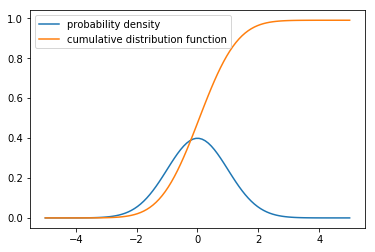

In [21]:
delta = (5 - (-5)) / 100
x = np.linspace(-5, 5, 100)
y = stats.norm.pdf(x, 0, 1)
cd = [sum(y[:i])*delta for i in range(len(x))]

plt.plot(x, y, label="probability density")
plt.plot(x, cd, label="cumulative distribution function")
plt.legend(loc="upper left")

## 期待値 (expectation)

ある関数$f(x)$の確率分布$p(x)$の下での平均値を$f(x)$の期待値といい、$\mathbb{E}[f]$と表記する。

離散分布では、

$\mathbb{E}[f] = \sum_x p(x)f(x)$

連続変数の場合、確率密度に関する積分となる。

$\mathbb{E}[f] = \int_{-\infty}^\infty p(x)f(x)dx$

期待値には以下の性質がある。ここでa, bは定数であり確率変数ではない。

- $\mathbb{E}[b] = b$
- $\mathbb{E}[x + b] = \mathbb{E}[x] + b$
- $\mathbb{E}[ax] = a\mathbb{E}[x]$
- $\mathbb{E}[ax + b] = a\mathbb{E}[x] + b$
- $\mathbb{E}[x + y] = \mathbb{E}[x] + \mathbb{E}[y]$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}[x + z] = \iint p(x, z)(x + z)dxdz$<br>

$ = \iint p(x, z)x + p(x, z)zdxdz$<br>

$ = \int x\int p(x, z)dzdx +\int z\int p(x, z)dxdz$<br>

$ = \int xp(x)dx +\int zp(z)dz$<br>

$ = \mathbb{E}[x] + \mathbb{E}[z]$

</p>

## 分散 (variance)

$f(x)$の分散を平均値の周りでのばらつきの尺度として以下のように定義する。

$\mathrm{var}[f] = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2]$

これは以下のように展開できる。

$\mathrm{var}[f] = \mathbb{E}[f(x)^2] - \mathbb{E}[f(x)]^2$

<p style="margin-left: 120px; font-size: 12px;">
$\mathrm{var}[f] = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2]$<br>

$ = \mathbb{E}[f(x)^2 -2f(x)\mathbb{E}[f(x)] + \mathbb{E}[f(x)]^2]$<br>

以下期待値の性質を使って展開していく。<br>

$ = \mathbb{E}[f(x)^2] + \mathbb{E}[-2f(x)\mathbb{E}[f(x)]] + \mathbb{E}[\mathbb{E}[f(x)]^2]$<br>

$\mathbb{E}[f(x)], \mathbb{E}[f(x)]^2$は定数なので、<br>

$ = \mathbb{E}[f(x)^2] - 2\mathbb{E}[f(x)]\mathbb{E}[f(x)] + \mathbb{E}[f(x)]^2$<br>

$ = \mathbb{E}[f(x)^2] - \mathbb{E}[f(x)]^2$
</p>

分散には以下の性質がある。ここでa, bは定数であり確率変数ではない。

- $\mathrm{var}[b] = 0$
- $\mathrm{var}[x + b] = \mathrm{var}[x]$
- $\mathrm{var}[ax] = a^2\mathrm{var}[x]$
- $\mathrm{var}[ax + b] = a^2\mathrm{var}[x]$

## 大数の法則 (law of large numbers)

確率分布から得られた確率変数の平均は、その分布の期待値に収束する。

$\frac{1}{N}\sum_{n=1}^{N}f(x_n) \to \mathbb{E}[f], N \to \infty$

分散もまた期待値なので、上記の方法で近似した期待値$\mu$を用いて同様の近似が成り立つ。

$\frac{1}{N}\sum_{n=1}^{N}(f(x_n) - \mu)^2 \to \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2] = \mathrm{var}[f], N \to \infty$

## 共分散 (covariance)

2つの確率変数xとyの**共分散**はxとyが同時に変動する度合いを表し、以下のように定義される。

$\mathrm{cov}[x, y] = \mathbb{E}_{x, y}[\{x - \mathbb{E}[x]\}\{y - \mathbb{E}[y]\}]$

これは以下のように展開できる。

$\mathrm{cov}[x, y] = \mathbb{E}_{x,y}[xy] - \mathbb{E}[x]\mathbb{E}[y]$

<p style="margin-left: 120px; font-size: 12px;">

$\mathrm{cov}[x, y] = \mathbb{E}_{x, y}[\{x - \mathbb{E}[x]\}\{y - \mathbb{E}[y]\}]$<br>

$ = \mathbb{E}_{x, y}[xy - \mathbb{E}[x]y - x\mathbb{E}[y] + \mathbb{E}[x]\mathbb{E}[y]]$<br>

$ = \mathbb{E}[x], \mathbb{E}[y], \mathbb{E}[x]\mathbb{E}[y]$は定数なので、<br>

$ = \mathbb{E}_{x, y}[xy] - \mathbb{E}[x]\mathbb{E}[y] - \mathbb{E}[x]\mathbb{E}[y] + \mathbb{E}[x]\mathbb{E}[y]$<br>

$ = \mathbb{E}_{x,y}[xy] - \mathbb{E}[x]\mathbb{E}[y]$
</p>

また確率変数ベクトルに対しては以下のように定義される。

$\mathrm{cov}[\mathbf{x}, \mathbf{y}] = \mathbb{E}_{\mathbf{x}, \mathbf{y}}[\{\mathbf{x} - \mathbb{E}[\mathbf{x}]\}\{\mathbf{y}^\top - \mathbb{E}[\mathbf{y}^\top]\}]$

$= \mathbb{E}_{\mathbf{x}, \mathbf{y}}[\mathbf{x}\mathbf{y}^\top] - \mathbb{E}[\mathbf{x}]\mathbb{E}[\mathbf{y}^\top]$

## 独立 (independent)

２つの確率変数の同時分布がその周辺分布の積に分解できるとき、XとYは**独立**であるという。

$p(X, Y) = p(X)p(Y)$

xとyが独立のとき以下が成り立つ。

- $\mathbb{E}_{x,y}[xy] = \mathbb{E}[x]\mathbb{E}[y]$

<p style="margin-left: 120px; font-size: 12px;">

$\mathbb{E}_{x,y}[xy] = \iint xyp(x, y)dxdy$<br>

xとyが独立のとき、$p(x, y) = p(x)p(y)$なので、<br>

$\mathbb{E}_{x,y}[xy] = \iint xyp(x)p(y)dxdy$<br>

$ = \int xp(x)dx\int yp(y)dy$<br>

$ = \mathbb{E}[x]\mathbb{E}[y]$

</p>

- $\mathrm{var}[x + y] = \mathrm{var}[x] + \mathrm{var}[y]$

<p style="margin-left: 120px; font-size: 12px;">

$\mathrm{var}[x + y] = \mathbb{E}[(x + y)^2] - \mathbb{E}[x + y]^2$<br>

$ = \mathbb{E}[x^2 + 2xy + y^2] - (\mathbb{E}[x] + \mathbb{E}[y])^2$<br>

$ = \mathbb{E}[x^2] + 2\mathbb{E}[xy] + \mathbb{E}[y^2] - (\mathbb{E}[x]^2 + 2\mathbb{E}[x]\mathbb{E}[y] + \mathbb{E}[y]^2)$<br>

$ = \mathbb{E}[x^2] - \mathbb{E}[x]^2 + 2\mathbb{E}[xy] - 2\mathbb{E}[x]\mathbb{E}[y] + \mathbb{E}[y^2] - \mathbb{E}[y]^2$<br>

$ = \mathrm{var}[x] + 2\mathbb{E}[xy] - 2\mathbb{E}[x]\mathbb{E}[y] + \mathrm{var}[y]$<br>

xとzが独立のとき、$\mathbb{E}[xy] = \mathbb{E}[x]\mathbb{E}[y]$なので、<br>

$\mathrm{var}[x + y] = \mathrm{var}[x] + \mathrm{var}[y]$

</p>

- $\mathrm{cov}[x, y] = 0$

## 尤度関数 (likelihood function)

データ$\mathcal{D}$を観測した事後のモデルパラメーター$\boldsymbol{w}$に関する不確実性は事後分布$p(\boldsymbol{w}|\mathcal{D})$で評価できる。ベイズの定理より、

$p(\boldsymbol{w}|\mathcal{D}) = \frac{p(\mathcal{D}|\boldsymbol{w})p(\boldsymbol{w})}{p(\boldsymbol{\mathcal{D}})}$

右辺にあらわれる$p(\mathcal{D}|\boldsymbol{w})$を**尤度関数**といい、パラメーターベクトル$\boldsymbol{w}$を固定したときに観測されたデータ集合がどれぐらい起こりやすいかを表す。尤度関数は$\mathcal{D}$を評価する$\boldsymbol{w}$の関数である。

尤度関数を導入すると、ベイズの定理は、

$\text{事後確率} \propto \text{尤度} \times \text{事前確率}$

と表せる。分母の$p(\mathcal{D})$は事後分布が積分すると１になることを保証する規格化定数である。尤度は$\boldsymbol{w}$の確率分布ではないため、$\boldsymbol{w}$に関する積分は１になるとは限らない。

<p style="margin-left: 120px; font-size: 12px;">
ベイズの定理の右辺$\frac{p(\mathcal{D}|\boldsymbol{w})p(\boldsymbol{w})}{p(\boldsymbol{\mathcal{D}})}$の$\boldsymbol{w}$に関する積分が１になることを示す。<br>

$\int \frac{p(\mathcal{D}|\boldsymbol{w})p(\boldsymbol{w})}{p(\boldsymbol{\mathcal{D}})}d\boldsymbol{w} = \int \frac{p(\mathcal{D}, \boldsymbol{w})}{p(\boldsymbol{\mathcal{D}})}d\boldsymbol{w}$<br>

加法定理$\int p(\mathcal{D}, \boldsymbol{w})d\boldsymbol{w} = p(\mathcal{D})$より、<br>

$\int \frac{p(\mathcal{D}, \boldsymbol{w})}{p(\boldsymbol{\mathcal{D}})}d\boldsymbol{w} = \frac{p(\mathcal{D})}{p(\mathcal{D})}$<br>

$ = 1$
</p>

# 情報理論

## 情報量

確率pの事象が実際に生起したことを知らせる情報に含まれている情報量を$-\log p$と定義する。

単位は、底が２のときはビット(bit)、底が１０のときはディット(dit)、自然対数のときはナット(nat)という。各単位の変換は、以下となる。

$1\text{ bit} = \ln2\text{ nat} = \log_{10}2\text{ dit}$

## エントロピー (entropy)

n個の事象がそれぞれ確率$p(x_1), \dots p(x_n)$で発生するとき、どれが発生したかの不確定度を、

$H[x_1, \dots, x_n] = -\sum_{i=1}^np(x_i)\log p(x_i)$

と定義し、エントロピーと呼ぶ。

エントロピーは非負である。

$H[x] \ge 0$

$H[x] = 0$が成り立つのは、どれか１つの$p(x_i)$が１で他はすべて０のときであり、そのときに限る。

n個の事象を表すエントロピーが最大になるときは、すべての事象が等しい確率を取る一様分布のとき$p(x_i) = \frac{1}{n}$で、このときの最大値は$H[x] = \log n$である。よって$H[x] \le \log n$が成り立つ。

## 条件付きエントロピー (conditional entropy)

一方の事象が何であるか分かっている状況のもとでの他方の事象の不確定度を**条件付きエントロピー**という。

条件付きエントロピーは以下のように定義される。

$H[y|x] = -\sum_i\sum_j p(x_i, y_j)\log p(y_j|x_i)$

<p style="margin-left: 120px; font-size: 12px;">

$x=x_i$が起きたと分かったときのyの不確定度を表すエントロピーは、<br>

$H[y|x_i] = -\sum_jp(y_j|x_i)\log p(y_j|x_i)$<br>

xは$x_i$以外も起きうるので、xが起きた下でのyの不確定度は$H[y|x_i]$をすべての$x_i$について平均したものとなり、<br>

$H[y|x] = \sum_ip(x_i)H[y|x_i]$<br>

$ = -\sum_i\sum_j p(x_i)p(y_j|x_i)\log p(y_j|x_i)$<br>

$ = -\sum_i\sum_j p(x_i, y_j)\log p(y_j|x_i)$<br>

この$H[y|x]$を条件付きエントロピーという。<br>

ここで$H[x, y]$は同時確率$p(x, y)$のエントロピーで、エントロピーの定義より以下のようになる。<br>

$H[x, y] = -\sum_i\sum_j p(x_i, y_j)\log p(x_i, y_j)$

</p>

## エントロピーの性質

- $H[x] \ge 0$
- $H[x, y] = H[x] + H[y|x] = H[y] + H[x|y]$

<p style="margin-left: 120px; font-size: 12px;">
$H[x, y] = -\sum_i\sum_j p(x_i, y_j)\ln p(x_i, y_j)$<br>

$ = -\sum_i\sum_j p(x_i, y_j)\ln \left(p(y_j|x_i)p(x_i)\right)$<br>

$ = -\sum_i\sum_j p(x_i, y_j)\left(\ln p(y_j|x_i) + \ln p(x_i)\right)$<br>

$ = -\sum_i\sum_j p(x_i, y_j)\ln p(y_j|x_i) - \sum_i\sum_j p(x_i, y_j)\ln p(x_i)$<br>

$ = -\sum_i\sum_j p(x_i, y_j)\ln p(y_j|x_i) - \sum_i p(x_i)\ln p(x_i)$<br>

$ = H[y|x] + H[x]$
</p>

- $H[y|x] \ge 0$
- $H[x] + H[y] \ge H[x, y]$

<p style="margin-left: 120px; font-size: 12px;">
$H[x, y] = H[x|y] + H[y], H[x, y] = H[y|x] + H[x]$を足し合わせて、<br>

$2H[x, y] = H[y|x] + H[x] + H[x|y] + H[y]$<br>

$ = 2(H[x] + H[y]) + (H[x|y] - H[x]) + (H[y|x] - H[y])$<br>

$ = 2(H[x] + H[y]) + 2I[x,y]$<br>

$H[x,y] = H[x] + H[y] + I[x,y]$<br>

$I[x,y] \ge 0$より、<br>

$H[x,y] \le H[x] + H[y]$
</p>

- $H[x] \ge H[x|y]$
- $H[x,y] \ge H[x], H[x,y] \ge H[y]$

## 微分エントロピー (differential entropy)

微分エントロピーはエントロピーの連続変数xの確率分布$p(x)$に対する拡張で、以下のように定義される。

$H[x] = -\int p(x)\ln p(x)dx$

連続変数を仮定している場合、微分エントロピーは単にエントロピーと呼ばれることが多い。

離散と連続の場合のエントロピーは$-\ln \Delta$だけ異なる。ここで$\Delta$はxを等間隔に分けた区間の長さである。$\Delta \to 0$の極限では$-\ln \Delta$は無限大に発散するので、連続変数を厳密に定義するには無限のビット数を必要とする。

## 相互情報量 (mutual information)

事象系xとyに関係があると、xを知ることによってyの情報が得られる。このときのエントロピーの減少分、つまりyのエントロピー$H[y]$から、xを知った後になお残るyのエントロピー$H[y|x]$を引いたものを**相互情報量**といい、$I[x,y]$で表す。

$I[x,y] = H[y] - H[y|x]$

## 相互情報量の性質

- $I[x,y] = I[y,x]$
- $I[x,y] \le H[x], I[x,y] \le H[y]$
- $I[x,y] \ge 0$

## 互いに独立な事象のエントロピー、相互情報量の性質

- $H[y|x] = H[y]$
- $H[x,y] = H[x] + H[y]$

<p style="margin-left: 120px; font-size: 12px;">
十分条件が成り立つことを示す。xとyが独立のとき、$H[x|y] = H[x], H[y|x] = H[y]$。<br>

よって、<br>

$H[x, y] = H[x|y] + H[y]$<br>

$ = H[x] + H[y]$<br>

必要条件が成り立つことを示す。$H[x, y] = H[x] + H[y]$が成り立つとき、$H[x, y] = H[x|y] + H[y], H[x, y] = H[y|x] + H[x]$より、<br>

$H[x|y] = H[x], H[y|x] = H[y]$<br>

よって$I[x,y] = 0$<br>

$I[x,y] = KL\left(p(x,y)\|p(x)p(y)\right)$より、$I[x,y] = 0$になるためには、$p(x,y) = p(x)p(y)$。よってxとyは独立である。<br>

以上より、xとyが独立、かつそのときに限り、$H[x, y] = H[x] + H[y]$<br>
</p>

- $I[x,y] = 0$

<p style="margin-left: 120px; font-size: 12px;">
xとyが独立のとき、$H[x|y] = H[x], H[y|x] = H[y]$なので、<br>

$I[x,y] = H[y] - H[y|x] = H[y] - H[y] = 0$<br>

$I[x,y] = H[x] - H[x|y] = H[x] - H[x] = 0$
</p>

## カルバック−ライブラーダイバージェンス (Kullback-Leibler divergence)

ある未知の分布$p(x)$を代わりに$q(x)$で近似した場合、xを特定するために必要な追加情報量(ナットを単位とする)の平均は以下となる。

$\mathrm{KL}(p \| q) = -\int p(x)\ln q(x)dx - \left(-\int p(x)\ln p(x)dx\right)$

$ = -\int p(x)\ln \frac{q(x)}{p(x)}dx$

これを$p(x)$と$q(x)$の間の**カルバック−ライブラーダイバージェンス** (KLダイバージェンス)あるいは**相対エントロピー** (relative entropy)という。

KLダイバージェンスは非負である。

$\mathrm{KL}(p \| q) \ge 0$

KLダイバージェンスは対称ではない。

$\mathrm{KL}(p \| q) \ne \mathrm{KL}(q \| p)$



## 正則化

正則化は過学習を抑制するテクニックである。正則化は誤差関数にペナルティー項を追加する。

L2正則化は誤差関数に$\frac{\lambda}{2}\|\boldsymbol{w}\|^2$を追加する。

$\boldsymbol{w}$のうち$w_0$（バイアス項）は正則化から外すことが多い。なぜなら$w_0$は目的変数の原点の選び方に依存しているからである。

# 誤差関数 (error function)

尤度関数の対数の符号を反転したものを誤差関数という。誤差の最小化、あるいは尤度の最大化は、観測されたデータ集合の確率を最大にするモデルパラメーターの値を選ぶことに相当する。


## 二乗和誤差 (sum-of-squares error)

$E(\boldsymbol{w}) = \frac{1}{2}\sum_{n=1}^N(y(\boldsymbol{w}) - t_n)^2$


## 平均二乗平方根誤差 (root-mean-square error)

$E(\boldsymbol{w}) = \sqrt{\frac{1}{2}\sum_{n=1}^N(y(\boldsymbol{w}) - t_n)^2/N}$

平均二乗平方根誤差は平方根をとっているため目的変数tと同じ単位になる。またデータ集合サイズNで割ることによりサイズの異なるデータ集合を比較することに使うことができる。

# 損失関数 (loss function)

# 期待損失

ToDo

## ミンコフスキー損失 (Minkowski loss)

$L_q = \int |y(x) - t|^q dt$

$\mathbb{E}[L]$

ToDo